## Imports and Setup

In [106]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

## Data Exploration

In [9]:
df = pd.read_csv('./XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


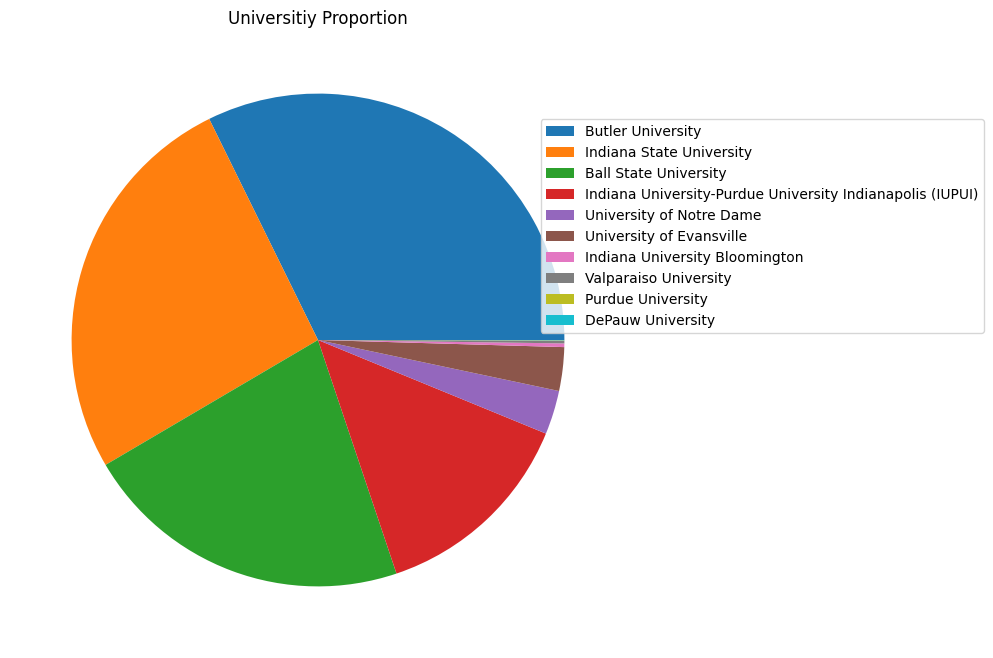

In [46]:
df = pd.read_csv('./XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
data = df['University'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=[None] * len(data))
plt.title('Universitiy Proportion')
plt.legend(data.index, loc="best", bbox_to_anchor=(0.85, 0.5))

plt.show()

From this pie chart that most of the students come to restruant are from Butler Universtity, Indiana State University, and Ball State University

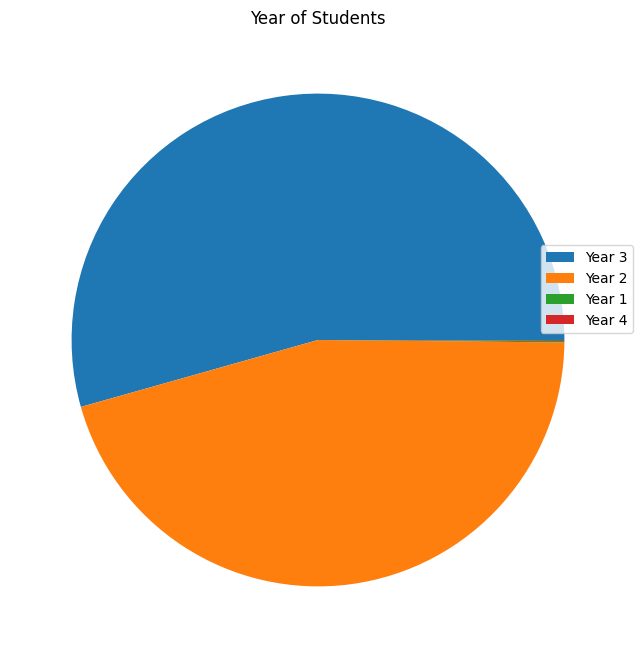

In [47]:
df = pd.read_csv('./XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
data = df['Year'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=[None] * len(data))
plt.legend(data.index, loc="best", bbox_to_anchor=(0.85, 0.5))
plt.title('Year of Students')
plt.show()

An analysis of the pie chart reveals that a substantial portion of the restaurant's clientele primarily consists of students from three prominent universities: Butler University, Indiana State University, and Ball State University. 

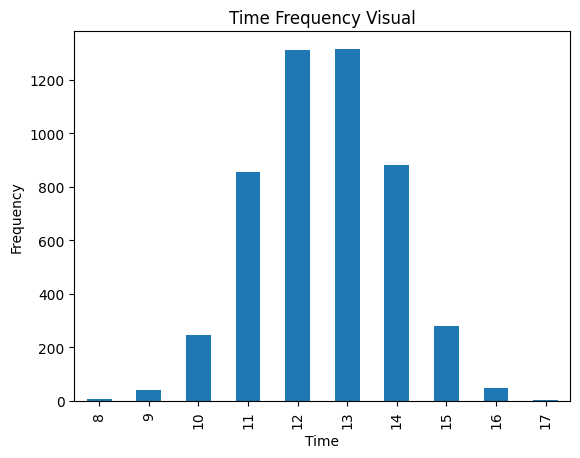

In [50]:
df = pd.read_csv('./XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
df['Time'].value_counts().sort_index(ascending=True).plot.bar(ylabel = 'Frequency', xlabel = 'Time',title = 'Time Frequency Visual')
plt.show()

Upon examining the visualization, a notable pattern emerges, indicating that a significant portion of the population prefers to be present at or around the hours of 12:00 pm and 1:00 pm.

# My Answer
Prompt: Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications.

## Ethical Implications

Data collection involves the acquisition of private customer information, which should only be used for purposes explicitly allowed by the customer, thereby limiting its use. To ensure proper ethical data practices, it is imperative that businesses maintain strict security over the stored information to prevent data breaches. Since customer data is voluntarily provided, there is the potential for data bias.

## Bussiness Outcome Implications

With proper data collection allows the restruant to get statistical feedback on how their business running and allows to make changes to the workflow of their business that will positively impact it. Data storage allows business to store data from the past so they can learn whatthey already and have seen what has worked and what hasn't. Data bias can negatively impact a business as it could show unpopularity for one item and popularity for other but actually they they're are ordered around the same because customers who order the proposed unpoplar item dont usually fill out the survey. Which can hurt business customer numbers. 

## Techinical Implications

The technical implications of data collection encompass the proper processing of new data added or modified by customers taking surveys. It's imperative to ensure that incoming data integrates accurately into the database to prevent the creation of erroneous or inconsistent data, which could potentially lead to data corruption. Regarding data storage, the primary technical concern is the ability to securely store data on a computer or server with sufficient capacity allocated for the volume of data being generated. Proper data storage is crucial for data integrity and accessibility. In addressing data bias from a technical perspective, it's essential to ensure that the survey mechanism, which customers use to provide their input, functions correctly. The survey should not manipulate or alter customer responses in any way, such as replacing answers or auto-filling responses. Maintaining the accuracy and reliability of the collected data relies on the proper operation of the survey mechanism.

## This code helped me find the best paramters for this kind of dataset

In [62]:

parameters = {'n_estimators':[10,50,100,500,1000],'class_weight':['balanced', 'balanced_subsample'],'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2', None]}


rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
X = df.drop('Order',axis = 1)
y = df['Order']
model = clf.fit(X,y)

In [80]:
model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 1000}

## This is the actual AI function that were asked for in the instructions

In [105]:
df = pd.read_csv('./XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
target_col = 'Order'
cat_cols = ['Year','Major','University']
def data_preparation(df, cat_cols):
    for col in cat_cols:
        hot = pd.get_dummies(df[col])
        df.drop(col,axis = 1, inplace = True )
        df = pd.concat([df, hot], axis=1)
    return df
def train_model(df, target_col):
    y= df[['Order']]
    X= df.drop('Order',axis = 1)
    with open('model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    loaded_model.fit(X.values,y.values)
    with open('model.pkl', 'wb') as file:
        pickle.dump(loaded_model,file)
    return loaded_model
df = data_preparation(df,cat_cols)
df = df.sample(frac= 1,random_state = 42)
split_index = math.ceil(len(df)*.80)
train = df[:split_index]
test = df[split_index:]
model = train_model(train,target_col)
y= test['Order']
X= test.drop('Order',axis = 1)
print(model.predict(X))
model.score(X,y)

C:\Users\kaide\AppData\Local\Temp\ipykernel_9476\2007896303.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  loaded_model.fit(X.values,y.values)
C:\Users\kaide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.675

## My Answer
Prompt: Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?

Given the 66% accuracy of guessing a student's order, implementing an AI solution should be considered. Some considerations I would make to determine if this is a suitable course of action is if there employees willing to consistenly, have enough computing processing power to run the AI, and finally if the data quality is maintained properly allowing the model to be trained properly